In [1]:

!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d rahulmakwana/corona-chest-xray-prediction

Dataset URL: https://www.kaggle.com/datasets/rahulmakwana/corona-chest-xray-prediction
License(s): unknown
 95% 166M/175M [00:01<00:00, 119MB/s] 
100% 175M/175M [00:02<00:00, 86.4MB/s]


In [2]:
!unzip /content/corona-chest-xray-prediction.zip

Archive:  /content/corona-chest-xray-prediction.zip
  inflating: Data/test/Covid/16669_3_1.jpeg  
  inflating: Data/test/Covid/16672_1_1.jpg  
  inflating: Data/test/Covid/2966893D-5DDF-4B68-9E2B-4979D5956C8E.jpeg  
  inflating: Data/test/Covid/353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB.jpeg  
  inflating: Data/test/Covid/41591_2020_819_Fig1_HTML.webp-day10.png  
  inflating: Data/test/Covid/41591_2020_819_Fig1_HTML.webp-day5.png  
  inflating: Data/test/Covid/80446565-E090-4187-A031-9D3CEAA586C8.jpeg  
  inflating: Data/test/Covid/B2D20576-00B7-4519-A415-72DE29C90C34.jpeg  
  inflating: Data/test/Covid/CD50BA96-6982-4C80-AE7B-5F67ACDBFA56.jpeg  
  inflating: Data/test/Covid/F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg  
  inflating: Data/test/Covid/F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg  
  inflating: Data/test/Covid/all14238-fig-0001-m-b.jpg  
  inflating: Data/test/Covid/all14238-fig-0001-m-c.jpg  
  inflating: Data/test/Covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavi

In [3]:
import tensorflow as tf


In [4]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory('/content/Data/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('/content/Data/test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='binary')

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, padding="same", input_shape=(224, 224, 3),
                                             activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))


classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))


classifier.add(tf.keras.layers.Convolution2D(filters=128, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=256, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.Dropout(0.2))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))


classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 56, 56, 64)        0

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

# Training the model with EarlyStopping callback
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=35,
                         validation_data=test_set,
                         validation_steps=4,
                         callbacks=[early_stopping_callback])

# Save the model after training
classifier.save('my_model.h5')


Epoch 1/35
4/4 [==============================] - 25s 6s/step - loss: 0.6753 - accuracy: 0.4800 - val_loss: 0.6262 - val_accuracy: 0.7200
Epoch 2/35
4/4 [==============================] - 23s 5s/step - loss: 0.5382 - accuracy: 0.7100 - val_loss: 0.5961 - val_accuracy: 0.5100
Epoch 3/35
4/4 [==============================] - 22s 5s/step - loss: 0.5618 - accuracy: 0.7100 - val_loss: 0.5789 - val_accuracy: 0.7400
Epoch 4/35
4/4 [==============================] - 21s 7s/step - loss: 0.5972 - accuracy: 0.5300 - val_loss: 0.5582 - val_accuracy: 0.8300
Epoch 5/35
4/4 [==============================] - 26s 7s/step - loss: 0.3903 - accuracy: 0.8900 - val_loss: 0.3900 - val_accuracy: 0.9000
Epoch 6/35
4/4 [==============================] - 24s 5s/step - loss: 0.2436 - accuracy: 0.9000 - val_loss: 0.1867 - val_accuracy: 0.9500
Epoch 7/35
4/4 [==============================] - 24s 5s/step - loss: 0.6181 - accuracy: 0.7700 - val_loss: 0.1442 - val_accuracy: 0.9500
Epoch 8/35
4/4 [==================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


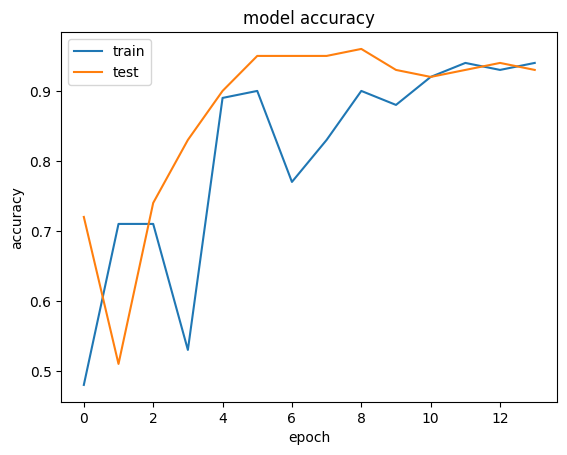

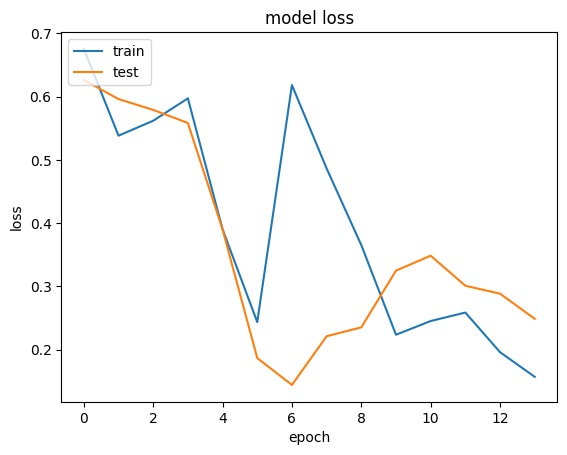

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [8]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/Data/test/Covid/16672_1_1.jpg',target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

1/1 [==============================] - 0s 187ms/step
Covid


In [10]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('/content/Data/test/Normal/IM-0234-0001.jpeg',target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

1/1 [==============================] - 0s 77ms/step
Normal


In [13]:
from keras.preprocessing import image
import numpy as np
import os
import tensorflow as tf

# image folder
folder_path = '/content/original test set'
# path to model
model_path = '/content/covid_19.h5'

# load the trained model
classifier = tf.keras.models.load_model(model_path)
classifier.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = classifier.predict(images, batch_size=10)
print(classes)

14/14 [==============================] - 4s 302ms/step
[[1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.5571867e-07]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [2.0774394e-38]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [9.9998152e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [1.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.000000

1/1 [==============================] - 0s 53ms/step


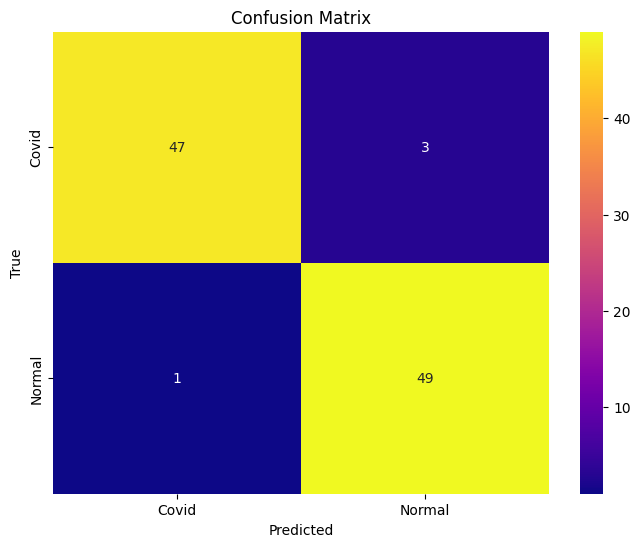

In [16]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Initialize lists to store predicted and true labels
y_pred = []
y_test = []

# Load and predict images from the 'Normal' directory
normal_images_path = "/content/Data/test/Normal"
for i in os.listdir(normal_images_path):
    img = image.load_img(os.path.join(normal_images_path, i), target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict(img)
    y_test.append(1)  # Assuming 1 represents 'Normal'
    y_pred.append(1 if p[0, 0] > 0.5 else 0)  # Convert probability to binary label

# Load and predict images from the 'Covid' directory
covid_images_path = "/content/Data/test/Covid"
for i in os.listdir(covid_images_path):
    img = image.load_img(os.path.join(covid_images_path, i), target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict(img)
    y_test.append(0)  # Assuming 0 represents 'Covid'
    y_pred.append(1 if p[0, 0] > 0.5 else 0)  # Convert probability to binary label

# Convert lists to numpy arrays
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='plasma', fmt='g', xticklabels=['Covid', 'Normal'], yticklabels=['Covid', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.98      0.94      0.96        52

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

